In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

The Street View House Numbers (SVHN) Dataset: 

SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Overview

The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).
Reference

1. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

The SVHN data set is a multi class classification problem. The data are pictures of 32X32 pixels and the labels are rom 0 to 9.

For image classification it is required that the image's information is suitable converted into the algorithm's required format that will be implemented to build a model. Like performing array transition, converting labels into one hot encoders and normalizing the training data.


In [0]:
import tensorflow as tf
tf.random.set_seed(42)


In [2]:
tf.__version__

'2.0.0'

In [0]:
#!pip install -U tensorflow==2.0

In [0]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# As data is in the h1py format
import h5py

2. Data fetching and understand the train/val/test splits.

In [0]:
# reading the h1py file
svhn = h5py.File('/content/drive/My Drive/Great Learning Residency 7.1 Neural Networks contd/project 2 neural networks/SVHN_single_grey1.h5', 'r')

In [8]:
# h5py.File acts like a Python dictionary, thus we can check the keys
 list(svhn.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [9]:
# respective values for each key in the h1py file
list(svhn.values())

[<HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">,
 <HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">,
 <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">,
 <HDF5 dataset "y_test": shape (18000,), type "|u1">,
 <HDF5 dataset "y_train": shape (42000,), type "|u1">,
 <HDF5 dataset "y_val": shape (60000,), type "|u1">]

In [0]:
# Shape of X_train depicts 18,000 images each of which is of 32X32 pixels So further down the line we will reshape it into 32*32=1024

In [0]:
fetch = list(svhn.keys())

# Get the data
X_test = list(svhn[fetch[0]])
X_train= list(svhn[fetch[1]])
X_val=list(svhn[fetch[2]])
y_test=list(svhn[fetch[3]])
y_train=list(svhn[fetch[4]])
y_val=list(svhn[fetch[5]])

In [12]:
print("length of X_train is :",len(X_train),"and","length of y_train is :",len(y_train))

length of X_train is : 42000 and length of y_train is : 42000


In [13]:
print("length of X_test is :",len(X_test),"and","length of y_test is :",len(y_test))

length of X_test is : 18000 and length of y_test is : 18000


In [14]:
print("length of X_val is :",len(X_val),"and","length of y_val is :",len(y_val))

length of X_val is : 60000 and length of y_val is : 60000


On excluding the validation data set, 42000 is the train data and 18000 is the test data. There is a 70-30 train test split if the data size is considered to be 60000

Converting the data which is in list form to array form

In [0]:
from numpy import array

In [0]:
x_train= array(X_train)
x_test=array(X_test)
y_train=array(y_train)
y_test=array(y_test)

In [17]:
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [18]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

Visualizing the data

In [0]:
import matplotlib.pyplot as plt

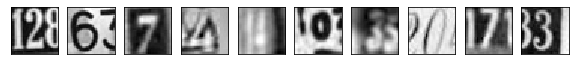

label for each of the above image: 2, 6, 7, 4, 4, 0, 3, 0, 7, 3


In [20]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap='gist_gray')  # cmap has various others options like cmaps['Sequential (2)'] = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper']
    
plt.show()
a=[]
for i in range(10):
    a.append(y_train[i])  

print ('label for each of the above image:',str(a)[1:-1])


Converting train and test labels to one hot vectors

We are given that SVHN is a multi-class classification problem. The dataset comprises of 10 classes represented with labels 0 to 9

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10) # that's why num classes=10 because we know 0 to 9 are he given class labels
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [22]:
trainY.shape

(42000, 10)

In [23]:
testY.shape

(18000, 10)

Normalizing both the train and test image data from 0-255 to 0-1

In [0]:
x_train/= 255
x_test/= 255

In [25]:
x_train[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [26]:
x_train.shape

(42000, 32, 32)


Reshape the train and test data so that KNN can be performed over it.
The feature image is in 2 dimenstional format.
The feature should be converted to 1 dimentional format to predict through algorithmns.
Reshaping the 2 dimentional image data to one dimentional array.

In [0]:
x_train = x_train.reshape(x_train.shape[0], 1024)   # x_train.shape[0] keeps the 42000 train data and 1024 because of reshape 32X 32 pixels
x_test = x_test.reshape(x_test.shape[0], 1024)

3. Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import pandas as pd

Performing cross validation to find the optimal number of neighbours using the Mis classification error. Misclassification error (MSE) = 1 - Test accuracy score

In [0]:
k=np.arange(1,30,2)

In [30]:
k

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [0]:
accuracy_scores=[]
for i in k:
# Instantiate the model . 
  knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
# Fit the model on the training data.
  knn=knn.fit(x_train, y_train)
# Predict the response for test dataset 
  y_pred = knn.predict(x_test)
# Storing the results 
  accuracy_scores.append(metrics.accuracy_score(y_test,y_pred))

In [32]:
accuracy_scores

[0.45916666666666667,
 0.4617777777777778,
 0.49016666666666664,
 0.5070555555555556,
 0.5124444444444445,
 0.518,
 0.5210555555555556,
 0.5235555555555556,
 0.5287222222222222,
 0.5271666666666667,
 0.5290555555555555,
 0.5297777777777778,
 0.5296666666666666,
 0.5322777777777777,
 0.5316111111111111]

In [0]:
# Calculating  Misclassification error (MSE) 
mse=[]
for i in accuracy_scores:
    mse.append(1-i)

In [34]:
mse

[0.5408333333333333,
 0.5382222222222222,
 0.5098333333333334,
 0.4929444444444444,
 0.4875555555555555,
 0.482,
 0.4789444444444444,
 0.47644444444444445,
 0.4712777777777778,
 0.4728333333333333,
 0.4709444444444445,
 0.4702222222222222,
 0.4703333333333334,
 0.46772222222222226,
 0.46838888888888885]

In [35]:
min(mse) # least mse

0.46772222222222226

In [36]:
mse.index(0.46772222222222226)

13

In [37]:
k[13]

27

Plotting misclassification error vs k (with k value on X-axis) using matplotlib.

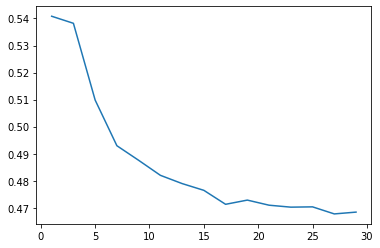

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k,mse)

In [0]:
knn_model = KNeighborsClassifier(n_neighbors=27,algorithm='brute')
knn_model = knn_model.fit(x_train, y_train)
y_pred_final = knn_model.predict(x_test)

In [40]:
# Getting the accuracy score for train data
knn_model.score(x_train, y_train)

0.6035

In [41]:
# Getting the accuracy score for test data
knn_model.score(x_test, y_test)*100

53.227777777777774

In [0]:
# Getting accuracy for validation data

In [0]:
x_val=array(X_val)
y_val=array(y_val)

In [0]:
x_val/= 255

In [45]:
x_val.shape

(60000, 32, 32)

In [0]:
x_val = x_val.reshape(x_val.shape[0], 1024)

In [47]:
knn_model.score(x_val, y_val)

0.5821333333333333

4. Print the classification metric report (2.5 points)

In [72]:
print(metrics.classification_report(y_test, y_pred_final))
#Precision – Accuracy of positive predictions
#Recall - Fraction of positives That were correctly identified.
#F1 Score - harmonic mean of precision and recall

              precision    recall  f1-score   support

           0       0.46      0.71      0.56      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.54      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.65      1812
           5       0.53      0.40      0.45      1768
           6       0.51      0.41      0.46      1832
           7       0.71      0.62      0.66      1808
           8       0.47      0.37      0.41      1812
           9       0.55      0.44      0.49      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000



With k=27,  the test accuray as 53.22 was achieved.

5. Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [50]:
model.fit(x_train,trainY,          
          validation_data=(x_test,testY),
          epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 7s 156us/sample - loss: 0.0901 - accuracy: 0.0988 - val_loss: 0.0900 - val_accuracy: 0.0955
Epoch 2/50
42000/42000 [==============================] - 6s 140us/sample - loss: 0.0900 - accuracy: 0.1017 - val_loss: 0.0900 - val_accuracy: 0.0955
Epoch 3/50
42000/42000 [==============================] - 6s 133us/sample - loss: 0.0900 - accuracy: 0.1010 - val_loss: 0.0900 - val_accuracy: 0.1006
Epoch 4/50
42000/42000 [==============================] - 6s 131us/sample - loss: 0.0900 - accuracy: 0.0991 - val_loss: 0.0900 - val_accuracy: 0.1004
Epoch 5/50
42000/42000 [==============================] - 6s 131us/sample - loss: 0.0900 - accuracy: 0.0998 - val_loss: 0.0900 - val_accuracy: 0.0955
Epoch 6/50
42000/42000 [==============================] - 5s 127us/sample - loss: 0.0900 - accuracy: 0.0986 - val_loss: 0.0900 - val_accuracy: 0.1008
Epoch 7/50
42000/42000 [==========================

Accuracy achieved is very low. Implementing backpropagation techniques

6. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model1.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model1.fit(x_train,trainY,          
          validation_data=(x_test,testY),
          epochs=50,
          batch_size=20)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 7s 156us/sample - loss: 2.0355 - accuracy: 0.2753 - val_loss: 1.5369 - val_accuracy: 0.4969
Epoch 2/50
42000/42000 [==============================] - 6s 146us/sample - loss: 1.3667 - accuracy: 0.5540 - val_loss: 1.1097 - val_accuracy: 0.6656
Epoch 3/50
42000/42000 [==============================] - 6s 145us/sample - loss: 1.1574 - accuracy: 0.6330 - val_loss: 1.1505 - val_accuracy: 0.6454
Epoch 4/50
42000/42000 [==============================] - 6s 149us/sample - loss: 1.0421 - accuracy: 0.6725 - val_loss: 1.0470 - val_accuracy: 0.6716
Epoch 5/50
42000/42000 [==============================] - 6s 144us/sample - loss: 0.9688 - accuracy: 0.6978 - val_loss: 0.9243 - val_accuracy: 0.7144
Epoch 6/50
42000/42000 [==============================] - 6s 146us/sample - loss: 0.9113 - accuracy: 0.7172 - val_loss: 0.8894 - val_accuracy: 0.7302
Epoch 7/50
42000/42000 [==========================

With SGD optimizer with learning rate 0.03 and categorical cross entropy function , the accuray of the model has increased significantly.
Implementing batch hnormalization.

7. Implement batch normalization for training the neural network (2.5 points)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model2.fit(x_train,trainY,          
          validation_data=(x_test,testY),
          epochs=50,
          batch_size=100)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 80us/sample - loss: 1.6369 - accuracy: 0.4701 - val_loss: 1.1881 - val_accuracy: 0.6534
Epoch 2/50
42000/42000 [==============================] - 3s 67us/sample - loss: 1.0371 - accuracy: 0.6846 - val_loss: 0.9589 - val_accuracy: 0.7050
Epoch 3/50
42000/42000 [==============================] - 3s 69us/sample - loss: 0.8718 - accuracy: 0.7357 - val_loss: 0.8226 - val_accuracy: 0.7552
Epoch 4/50
42000/42000 [==============================] - 3s 70us/sample - loss: 0.7867 - accuracy: 0.7614 - val_loss: 0.7550 - val_accuracy: 0.7794
Epoch 5/50
42000/42000 [==============================] - 3s 68us/sample - loss: 0.7220 - accuracy: 0.7814 - val_loss: 0.7085 - val_accuracy: 0.7954
Epoch 6/50
42000/42000 [==============================] - 3s 69us/sample - loss: 0.6775 - accuracy: 0.7954 - val_loss: 0.7369 - val_accuracy: 0.7813
Epoch 7/50
42000/42000 [==============================] 

In [55]:
# Evaluating for test data
model2.evaluate(x_test,testY)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6614615140888426, 0.84344447]

In [59]:
# Evaluating for train data
model2.evaluate(x_train,trainY)

42000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1993072683059034, 0.94080955]

In [0]:
valY = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [61]:
# Evaluating for validation data
model2.evaluate(x_val,valY)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.337953542025884, 0.9116]

In [0]:
predictionsNN = model2.predict(x_test)

In [0]:
ClassificationReportNN = metrics.classification_report(testY.argmax(axis=1), predictionsNN.argmax(axis=1))

In [67]:
print(ClassificationReportNN)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1814
           1       0.87      0.83      0.85      1828
           2       0.82      0.89      0.86      1803
           3       0.82      0.79      0.80      1719
           4       0.88      0.86      0.87      1812
           5       0.86      0.82      0.84      1768
           6       0.87      0.82      0.84      1832
           7       0.90      0.87      0.88      1808
           8       0.80      0.83      0.82      1812
           9       0.82      0.84      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



8. Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

From the above values of KNN and Neural Network, it is evident there is a very bigchange in accuracy and classification metrics. KNN : 53.22% accurate whereas DNN: 84.34% accurate

The classification metrics for test data for both the models: for KNN at an average : precision : 54%, Recall : 53% whereas for DNN at an average: precision : 84%, recall : 84%


In [0]:
# Computing classsification metrics for both the KNN model and Neural Network model (model2) for the validation data.

1) KNN classification report for validation data

In [0]:
y_pred_val = knn_model.predict(x_val)

In [74]:
print(metrics.classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.48      0.75      0.59      6000
           1       0.48      0.76      0.59      6000
           2       0.68      0.59      0.63      6000
           3       0.55      0.50      0.53      6000
           4       0.68      0.68      0.68      6000
           5       0.60      0.47      0.53      6000
           6       0.58      0.47      0.52      6000
           7       0.74      0.67      0.70      6000
           8       0.55      0.43      0.48      6000
           9       0.62      0.50      0.55      6000

    accuracy                           0.58     60000
   macro avg       0.60      0.58      0.58     60000
weighted avg       0.60      0.58      0.58     60000



2) Neural Network classification report for validation data

In [0]:
predictionsNN_val = model2.predict(x_val)

In [0]:
ClassificationReportNN_val = metrics.classification_report(valY.argmax(axis=1), predictionsNN_val.argmax(axis=1))

In [78]:
print(ClassificationReportNN_val)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6000
           1       0.92      0.90      0.91      6000
           2       0.89      0.95      0.92      6000
           3       0.92      0.88      0.90      6000
           4       0.93      0.92      0.93      6000
           5       0.94      0.89      0.91      6000
           6       0.93      0.90      0.91      6000
           7       0.95      0.93      0.94      6000
           8       0.89      0.90      0.89      6000
           9       0.90      0.92      0.91      6000

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000



From the above values of KNN and Neural Network, it is evident there is a very bigchange in accuracy and classification metrics. KNN : 58.21% accurate whereas DNN: 91.16% accurate

The classification metrics for validation data for both the models: for KNN at an average : precision : 60%, Recall : 58% whereas for DNN at an average: precision : 91%, recall : 91%


Hence It can be concluded, the DNN works much better than traditional knn in the real time data like SVHN

INSIGHTS
1) The computational time for KNN is very much higher than the Deep Neural Network while predicting.

2) DNN yields better results with more data. As evident in classification report, there is utmost equally distributed data in all the classes. So DNN learns the each class better and yields better results.

3) K-NN accuracy depends on the K value. For any given training set, the best choice for K would be the one striking the optimal trade-off between bias and variance.